In [35]:
import pandas as pd
import geopandas as gpd

#eez = gpd.read_file('/Users/Zack/1_sw_eez/eez_v11.shp')
#eez = eez[eez['GEONAME'] == 'French Exclusive Economic Zone']
#eez
#eez.to_file("/Users/Zack/1_sw_eez/FRA_EEZ.geojson", driver="GeoJSON")

In [36]:
#load spatial data
eez = gpd.read_file('/Users/Zack/0_sw_eez/eez_v11.shp')

#spain
#country = gpd.read_file('/Users/Zack/1_sw_countries/countries/ESP_adm0.shp')
#eez = eez[eez['GEONAME'] == 'Spanish Exclusive Economic Zone']  
#eez_prep = gpd.read_file('/Users/Zack/1_sw_eez/eez_prep/ESP.geojson')

#france
#country = gpd.read_file('/Users/Zack/1_sw_countries/countries/FRA_adm0.shp')
#eez = eez[eez['GEONAME'] == 'French Exclusive Economic Zone']  
#eez_prep = gpd.read_file('/Users/Zack/1_sw_eez/eez_prep/FRA.geojson')

#italy
#country = gpd.read_file('/Users/Zack/1_sw_countries/countries/ITA_adm0.shp')
#eez = eez[eez['GEONAME'] == 'Italian Exclusive Economic Zone']  
#eez_prep = gpd.read_file('/Users/Zack/1_sw_eez/eez_prep/ITA.geojson')

#croatia
#country = gpd.read_file('/Users/Zack/1_sw_countries/HRV_adm0.shp')
#eez = eez[eez['GEONAME'] == 'Croatian Exclusive Economic Zone']
#eez_prep = gpd.read_file('/Users/Zack/1_sw_eez/eez_prep/HRV.geojson')

#cyprus
# country = gpd.read_file('./0_countries/CYP_adm0.shp')
# eez = eez[eez['GEONAME'] == 'Cypriote Exclusive Economic Zone']  
# eez_prep = gpd.read_file('./2_eez/eez_prep/CYP.geojson')

#turkey
# country = gpd.read_file('./0_countries/TUR_adm0.shp')
# eez = eez[eez['GEONAME'] == 'Turkish Exclusive Economic Zone']  
# eez_prep = gpd.read_file('./2_eez/eez_prep/TUR.geojson')

#malta
country = gpd.read_file('./0_countries/ALB_adm0.shp')
eez = eez[eez['GEONAME'] == 'Albanian Exclusive Economic Zone']  
eez_prep = gpd.read_file('./2_eez/eez_prep/ALB.geojson')

#greece
#country = gpd.read_file('/Users/Zack/0_greece/greece_adm/GRC_adm0.shp')
#eez = gpd.read_file('/Users/Zack/0_greece/EEZ/greece_EEZ.shp')
#eez_prep = gpd.read_file('/Users/Zack/0_greece/EEZ/eez_prep.shp') #created with geojson.io

#mask = gpd.read_file('/Users/Zack/0_greece/dem_eu/eu_dem_v11_mask.shp') 
#will obtain mask directly when #gdal is resolved

#eez = eez.to_crs({'init': 'epsg:2100'})
#eez_prep = eez_prep.to_crs({'init': 'epsg:2100'})
#country = country.to_crs({'init': 'epsg:2100'})

print('country:', country.crs)
print('eez:', eez.crs)
print('eez_prep:', eez_prep.crs)
#print('mask:', mask.crs)

country: {'init': 'epsg:4326'}
eez: {'init': 'epsg:4326'}
eez_prep: {'init': 'epsg:4326'}


In [37]:
eez

,MRGID,GEONAME,MRGID_TER1,POL_TYPE,MRGID_SOV1,TERRITORY1,ISO_TER1,SOVEREIGN1,MRGID_TER2,MRGID_SOV2,...,ISO_SOV1,ISO_SOV2,ISO_SOV3,UN_SOV1,UN_SOV2,UN_SOV3,UN_TER1,UN_TER2,UN_TER3,geometry
177,5670.0,Albanian Exclusive Economic Zone,2153.0,200NM,2153.0,Albania,ALB,Albania,0.0,0.0,...,ALB,None,None,8,NaN,NaN,8.0,NaN,NaN,"POLYGON ((20.00835275627514 39.69182097885536,..."


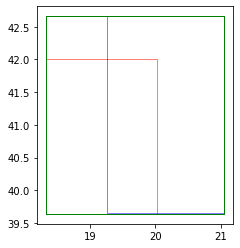

In [38]:
#create envelope

#generate envelopes
eez_e = gpd.GeoDataFrame(geometry = eez.envelope)
country_e = gpd.GeoDataFrame(geometry = country.envelope)

#combine envelopes
merge = gpd.overlay(country_e, eez_e, how = 'union')
merge['Dissolve'] = 0

#dissolve envelopes and make new envelope
envelope = merge.dissolve('Dissolve')
envelope = gpd.GeoDataFrame(geometry = envelope.envelope)
#print('envelope', envelope.crs)

#change projection
#envelope = envelope.to_crs({'init': 'epsg:4326'})
#print('envelope', envelope.crs)

#plot
#envelope = envelope.to_crs({'init': 'epsg:2100'})
ax = eez_e.plot(linewidth=.5, edgecolor = 'red', facecolor = 'none')
country_e.plot(linewidth=.5, edgecolor = 'blue', facecolor = 'none', ax=ax)
envelope.plot(linewidth=1, edgecolor = 'green', facecolor = 'none', ax=ax)

#export
envelope.to_file("./1_envelope/ALB_envelope.shp")
envelope.to_file("./1_envelope/ALB_envelope.geojson", driver="GeoJSON")

Wall time: 121 ms


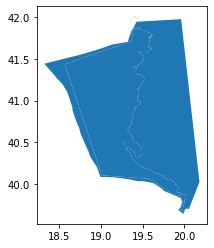

In [39]:
%%time 
merge = gpd.overlay(eez, eez_prep, how = 'union')
merge.plot()

Wall time: 333 ms


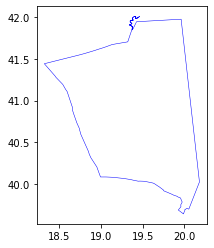

In [40]:
%%time 
#convert eez to an outline
merge = gpd.overlay(eez, eez_prep, how = 'union')
merge['Dissolve'] = 0
eez_dis = merge.dissolve('Dissolve')
eez_dis.plot(linewidth=.5, edgecolor = 'blue', facecolor = 'none')

Wall time: 863 ms


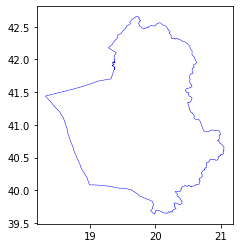

In [41]:
%%time 
#combine eez and country to create aoi
merge = gpd.overlay(eez_dis, country, how = 'union')
merge['Dissolve'] = 0
aoi = merge.dissolve('Dissolve')
aoi.plot(linewidth=.5, edgecolor = 'blue', facecolor = 'none')

In [42]:
#export aoi
aoi.to_file('./3_aoi/ALB_aoi.shp')
#aoi.to_file('./3_aoi/CYP_aoi.geojson', driver = "GeoJSON")

In [43]:
%%time 
#generate 50m buffer of land mask
#mask = mask.to_crs({'init': 'epsg:2100'})
#mask_50m = mask.buffer(50)
#mask_50m = gpd.GeoDataFrame(geometry = mask_50m)
#mask_50m.plot()

Wall time: 0 ns


In [44]:
%%time
#generate 5km buffer of land mask
#mask_5km = mask.buffer(5000)
#mask_5km = gpd.GeoDataFrame(geometry = mask_5km)
#mask_5km.plot()

Wall time: 0 ns


In [45]:
%%time
#union 50m land mask to aoi to create water_50m
#mask_50m = mask_50m.to_crs({'init': 'epsg:4326'})
#aoi = mask_50m.to_crs({'init': 'epsg:4326'})

#merge = gpd.overlay(aoi, mask_50m, how = 'union')
#merge.plot(linewidth=.5, edgecolor = 'blue', facecolor = 'none')

Wall time: 0 ns


In [46]:
%%time
#select the water area
#gpd.GeoDataFrame(geometry = merge.loc[[0], 'geometry'])

Wall time: 0 ns


In [47]:
%%time
#union water 50m with 5km buffer to create search area

#select the water area between 50m and 5km

#merge2 = gpd.overlay(merge, mask_5k, how = 'union')
#merge2.plot(linewidth=.5, edgecolor = 'blue', facecolor = 'none')

Wall time: 0 ns
